<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Build/blob/master/TheBees_1_of_2_notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install chart_studio

     |████████████████████████████████| 81kB 2.2MB/s 


The above and below functions were necessary to make the code work.

In [0]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot') 
import matplotlib.pyplot as plt
import chart_studio.plotly as pltly
import numpy as np
import chart_studio
chart_studio.tools.set_config_file(
    plotly_domain='https://plotly.your-company.com',
    plotly_api_domain='https://plotly.your-company.com',
    plotly_streaming_domain='https://stream-plotly.your-company.com',
    world_readable=False,
    sharing='private'
)
#!pip install seaborn as sns

The column headers or column titles had to be added to the dataframe.  

The dataframe bee_colonies_loss.csv came fram data.world.

This dataframe was very messy, and had a major overhaul using exel.

In [0]:
column_headers = ['year','season','state','total_annual_loss', 'beekeepers', 'beekeepers_exculsive_to_state','colonies','colonies_exclusive_to_state','total_loss']
df=pd.read_csv('http://marso.space/bee/bee_colony_loss.csv', header=None, names=column_headers)

In [0]:
df.head()

,year,season,state,total_annual_loss,beekeepers,beekeepers_exculsive_to_state,colonies,colonies_exclusive_to_state,total_loss
0,2016/17,Annual,Massachusetts,0.159,87,0.94,"27,186.00",0.02,4322.57
1,2016/17,Annual,Montana,0.171,21,0.52,"35,905.00",0,6139.76
2,2016/17,Annual,Nevada,0.230,13,0.92,"2,512.00",0.05,577.76
3,2016/17,Annual,Maine,0.233,65,0.94,"41,102.00",0.01,9576.77
4,2016/17,Annual,Wyoming,0.234,18,0.78,"6,521.00",0.01,1525.91


In [0]:
df.dtypes

year                              object
season                            object
state                             object
total_annual_loss                float64
beekeepers                         int64
beekeepers_exculsive_to_state     object
colonies                          object
colonies_exclusive_to_state       object
total_loss                       float64
dtype: object

Because the year was comingled, 2016/17, it was split and the trailing year not necessay, was discarded.

In [0]:
dfd= df['year'].str.split('/', expand=True)
dfd.head(1)


,0,1
0,2016,17


In [0]:
# cts.rename(columns={'0': 'year','1':'to'})
# cts.head(1)
dfd.rename(columns={0: 'year', 1 : 'to'},inplace=True)
dfd.head(1)

,year,to
0,2016,17


In [0]:
dfd= dfd.drop('to', axis='columns')
dfd.head(1)

,year
0,2016


Below the year was removed from the dataframe and the new 

configured year dataframe was joined with the original dataframe.

In [0]:
dfc=df
dfc.head(1)

,year,season,state,total_annual_loss,beekeepers,beekeepers_exculsive_to_state,colonies,colonies_exclusive_to_state,total_loss
0,2016/17,Annual,Massachusetts,0.159,87,0.94,"27,186.00",0.02,4322.57


In [0]:
dfc = dfc.drop('year', axis='columns')
dfc.head(1)

,season,state,total_annual_loss,beekeepers,beekeepers_exculsive_to_state,colonies,colonies_exclusive_to_state,total_loss
0,Annual,Massachusetts,0.159,87,0.94,"27,186.00",0.02,4322.57


The following code joins the four digit year column with the rest of the dataframe.

In [0]:
 dfh = dfd.join(dfc)

In [0]:
dfh.head()


,year,season,state,total_annual_loss,beekeepers,beekeepers_exculsive_to_state,colonies,colonies_exclusive_to_state,total_loss
0,2016,Annual,Massachusetts,0.159,87,0.94,"27,186.00",0.02,4322.57
1,2016,Annual,Montana,0.171,21,0.52,"35,905.00",0,6139.76
2,2016,Annual,Nevada,0.230,13,0.92,"2,512.00",0.05,577.76
3,2016,Annual,Maine,0.233,65,0.94,"41,102.00",0.01,9576.77
4,2016,Annual,Wyoming,0.234,18,0.78,"6,521.00",0.01,1525.91


The following code removes a comma from column values.

In [0]:

dfh['colonies']= dfh['colonies'].astype(str) 
dfh['colonies']=dfh['colonies'].str.replace(',','' )

dfh['colonies']=dfh['colonies'].astype(float)

In [0]:
dfh.head()

,year,season,state,total_annual_loss,beekeepers,beekeepers_exculsive_to_state,colonies,colonies_exclusive_to_state,total_loss
0,2016,Annual,Massachusetts,0.159,87,0.94,27186.0,0.02,4322.57
1,2016,Annual,Montana,0.171,21,0.52,35905.0,0,6139.76
2,2016,Annual,Nevada,0.230,13,0.92,2512.0,0.05,577.76
3,2016,Annual,Maine,0.233,65,0.94,41102.0,0.01,9576.77
4,2016,Annual,Wyoming,0.234,18,0.78,6521.0,0.01,1525.91


In [0]:
year_colonies=dfh.groupby(['year']).agg({'colonies':'sum'})

In [0]:
year_beekeepers=dfh.groupby(['year']).agg({'beekeepers':'sum'})


From the following code I was able to plot 'Beekeepers in the USA'

In [0]:
year_beekeepers.head(10)

,beekeepers
year,
2010,2630
2011,3223
2012,4516
2013,6202
2014,5134
2015,4973
2016,4324


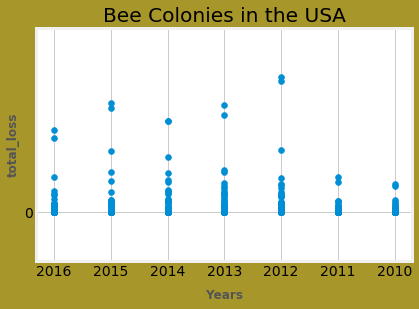

In [0]:

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

plt.style.use('fivethirtyeight')
#fake =pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
#                index=range(1,11))
#generate the figure
fig, ax = plt.subplots()
#fig = plt.figure()
fig.patch.set(facecolor='#A79629')

# generate the axes (center section) for the plot
#ax = ax=fake.plot.bar(color='C1', width=0.9)
ax.set(facecolor='white')


ax.set_ylabel('total_loss', fontsize=12, fontweight='bold')
ax.set_xlabel('Years', fontsize=12, fontweight='bold', labelpad=10)

# fix our tick lables
ax.set_xticklabels([2016,2015,2014,2013,2012,2011,2010], color='black', rotation=0) # (range(1,11))
ax.set_yticks(range(0,14800000,2000000))
ax.set_yticklabels(range(0, 14800000 , 2000000), color='black',)

plt.title('Bee Colonies in the USA')
plt.scatter(dfh.year,dfh.colonies)
plt.show()

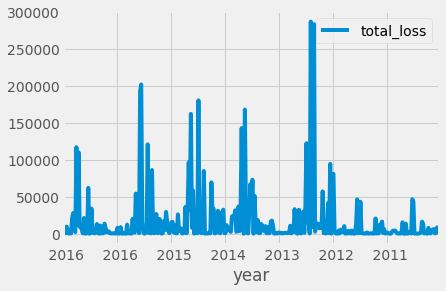

In [0]:
import matplotlib.pyplot as pls 
dfh.plot(x='year', y='total_loss', kind='line') 
plt.show()

In [0]:
dfh.head()

,year,season,state,total_annual_loss,beekeepers,beekeepers_exculsive_to_state,colonies,colonies_exclusive_to_state,total_loss
0,2016,Annual,Massachusetts,0.159,87,0.94,27186.0,0.02,4322.57
1,2016,Annual,Montana,0.171,21,0.52,35905.0,0,6139.76
2,2016,Annual,Nevada,0.230,13,0.92,2512.0,0.05,577.76
3,2016,Annual,Maine,0.233,65,0.94,41102.0,0.01,9576.77
4,2016,Annual,Wyoming,0.234,18,0.78,6521.0,0.01,1525.91


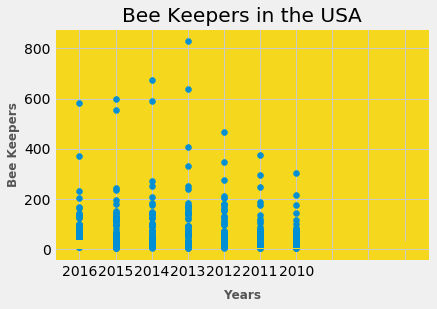

In [0]:

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

plt.style.use('fivethirtyeight')
fake =pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                index=range(1,11))
#generate the figure
fig 
fig.patch.set(facecolor='#A79629')

# generate the axes (center section) for the plot
ax = ax=fake.plot.bar(color='#F5D81D', width=0.9)
ax.set(facecolor='#F5D81D')


ax.set_ylabel('Bee Keepers', fontsize=12, fontweight='bold')
ax.set_xlabel('Years', fontsize=12, fontweight='bold', labelpad=10)

# fix our tick lables
ax.set_xticklabels([2016,2015,2014,2013,2012,2011,2010], color='black', rotation=0) # (range(1,11))
ax.set_yticks(range(0,1000,200))
ax.set_yticklabels(range(0, 1000 , 200), color='black',)

plt.title('Bee Keepers in the USA')
plt.scatter(dfh.year,dfh.beekeepers)
plt.show()

Some plots were easier than others, this area is clean,

but at one time it was very messy, with many other

visuals and their code. There is more in TheBees_2_of_2_notebook